In [10]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [16]:
N = 50
std = 0.4

Apple_width = np.random.normal(6, std, N)
Apple_length = np.random.normal(6, std, N)

Benanas_width = np.random.normal(4, std, N)
Benanas_length = np.random.normal(8, std, N)

In [18]:
width = np.concatenate((Apple_width, Benanas_width))
length = np.concatenate((Apple_length, Benanas_length))

In [19]:
X = np.array([width, length]).T
Apple_lable = np.zeros(N, dtype = 'int') 
Benanas_lable = np.ones(N, dtype = 'int')

In [20]:
Y = np.concatenate((Apple_lable,Benanas_lable))

In [28]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)
#print(Y_train)
print(X_test)

[[4.05313859 7.87776465]
 [4.08526966 8.06480675]
 [3.66548182 7.44302698]
 [4.05879423 7.19882182]
 [3.37802713 7.87827603]
 [6.14457115 5.9659019 ]
 [5.74983027 5.49313894]
 [5.59822527 6.43923737]
 [3.82109904 7.97234519]
 [4.81990392 5.72107396]
 [3.79517661 8.04731113]
 [6.19822759 5.76489308]
 [6.03973889 5.88343378]
 [4.03079417 7.62244739]
 [5.88857736 6.02101205]
 [5.71509512 5.9525688 ]
 [5.27059287 5.80047598]
 [5.87761244 5.8314464 ]
 [4.25231036 7.70647281]
 [3.1580294  8.2011801 ]
 [3.93643636 8.60837063]
 [4.60999914 8.2875828 ]
 [5.84865704 5.81273669]
 [6.38809002 5.4638206 ]
 [3.5333881  7.97558136]]


In [23]:
print("whole dataset:", X.shape, Y.shape)
print("training set:", X_train.shape,Y_train.shape)
print("test set:", X_test.shape, Y_test.shape)

whole dataset: (100, 2) (100,)
training set: (75, 2) (75,)
test set: (25, 2) (25,)


Text(0, 0.5, 'Length')

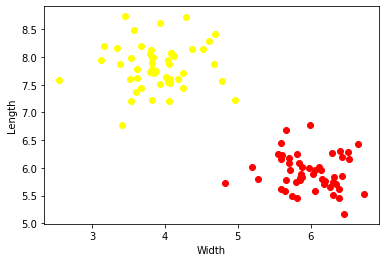

In [24]:
fig = plt.figure()
plt.scatter(X[0:N , 0] , X[0:N , 1] ,  c = 'RED')
plt.scatter(X[N: ,0] , X[N: ,1]  , c = 'yellow')
plt.xlabel('Width')
plt.ylabel('Length')

In [7]:
class kNearestNeighbors(): 


    def __init__(self, k):
        self.k = k 


    def fit(self, X_train , Y_train): 
        self.X_train = X_train
        self.Y_train = Y_train
        self.number_classes = len(np.unique(Y_train))


    def nearNeighbors(self , X_test):
        dist = np.sqrt(np.sum((X_test - self.X_train)**2 ,axis=1))
        near_neighbors = np.argsort(dist)[:self.k]
        print(near_neighbors)
        print(self.Y_train[near_neighbors])
        print(np.bincount(self.Y_train[near_neighbors]))
        return near_neighbors

        
    def predict (self, X_test):
        near_neighbors = self.nearNeighbors(X_test)
        y = np.argmax(np.bincount(self.Y_train[near_neighbors]))
        return y

In [8]:
knn = kNearestNeighbors(k=5)
knn.fit(X,Y)

In [29]:
y_pred = knn.predict(X_test)


ValueError: operands could not be broadcast together with shapes (25,2) (2000,2) 